## SQL using Ollama, ChromaDB

In [1]:
# %pip install 'vanna[chromadb]'

In [1]:
from vanna.ollama import Ollama
from vanna.chromadb import ChromaDB_VectorStore

In [3]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

vn = MyVanna(config={'model': 'llama3:instruct'})

In [4]:
vn.connect_to_sqlite('./coffee.db')

## Training
You only need to train once. Do not train again unless you want to add more training data.

In [5]:
# df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

# for ddl in df_ddl['sql'].to_list():
#   vn.train(ddl=ddl)

Adding ddl: CREATE TABLE employees (
        employee_id INT PRIMARY KEY,
        first_name VARCHAR(50),
        last_name VARCHAR(50),
        email VARCHAR(50),
        hire_date DATE,
        gender VARCHAR(1), -- "M"/"F" (male/female)
        salary INT,
        coffeeshop_id INT,
        FOREIGN KEY (coffeeshop_id) REFERENCES shops (coffeeshop_id) ON DELETE SET NULL
    )
Adding ddl: CREATE TABLE shops (
        coffeeshop_id INT PRIMARY KEY,
        coffeeshop_name VARCHAR(50),
        city_id INT,
        FOREIGN KEY (city_id) REFERENCES locations (city_id) ON DELETE SET NULL
    )
Adding ddl: CREATE TABLE locations (
        city_id INT PRIMARY KEY,
        city VARCHAR(50),
        country VARCHAR(50)
    )
Adding ddl: CREATE TABLE suppliers (
        coffeeshop_id INT,
        supplier_name VARCHAR(40),
        coffee_type VARCHAR(20),
        PRIMARY KEY (coffeeshop_id, supplier_name),
        FOREIGN KEY (coffeeshop_id) REFERENCES shops (coffeeshop_id) ON DELETE CASCADE
  

In [ ]:

# # The following are methods for adding training data. Make sure you modify the examples to match your database.

# # DDL statements are powerful because they specify table names, colume names, types, and potentially relationships
# vn.train(ddl="""
#     CREATE TABLE IF NOT EXISTS layoffs_staging2 (
#         company TEXT,
#         location TEXT,
#         industry TEXT,
#         total_laid_off TEXT,
#         percentage_laid_off TEXT,
#         stage TEXT,
#         country TEXT,
#         funds_raised_millions TEXT, 
#         new_date date
#     )
# """)

# Sometimes you may want to add documentation about your business terminology or definitions.
# vn.train(documentation="Our business defines OTIF score as the percentage of orders that are delivered on time and in full")

# You can also add SQL queries to your training data. This is useful if you have some queries already laying around. 
# You can just copy and paste those from your editor to begin generating new SQL.
# vn.train(sql="SELECT * FROM my-table WHERE name = 'John Doe'")

In [6]:
# # At any time you can inspect what training data the package is able to reference

# training_data = vn.get_training_data()
# training_data

,id,question,content,training_data_type
0,0cdd09b6-7c9a-5207-8d48-dff30c3a5f4d-ddl,None,CREATE TABLE locations (\n city_id INT ...,ddl
1,0d8c534e-033f-5d53-a09e-2ee9150abd2f-ddl,None,CREATE TABLE shops (\n coffeeshop_id IN...,ddl
2,6290584a-c719-5257-b9c6-79865720536e-ddl,None,CREATE TABLE suppliers (\n coffeeshop_i...,ddl
3,95affaf8-f2c3-5f94-a7c1-f5679ffa81b3-ddl,None,CREATE TABLE employees (\n employee_id ...,ddl


In [ ]:
# You can remove training data if there's obsolete/incorrect information. 
# vn.remove_training_data(id='1-ddl')


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2
Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4


[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE suppliers (\n        coffeeshop_id INT,\n        supplier_name VARCHAR(40),\n        coffee_type VARCHAR(20),\n        PRIMARY KEY (coffeeshop_id, supplier_name),\n        FOREIGN KEY (coffeeshop_id) REFERENCES shops (coffeeshop_id) ON DELETE CASCADE\n    )\n\nCREATE TABLE shops (\n        coffeeshop_id INT PRIMARY KEY,\n        coffeeshop_name VARCHAR(50),\n        city_id INT,\n        FOREIGN KEY (city_id) REFERENCES locations (city_id) ON DELETE SET NULL\n    )\n\nCREATE TABLE locations (\n        city_id INT PRIMARY KEY,\n        city VARCHAR(50),\n        country VARCHAR(50)\n    )\n\nCREATE

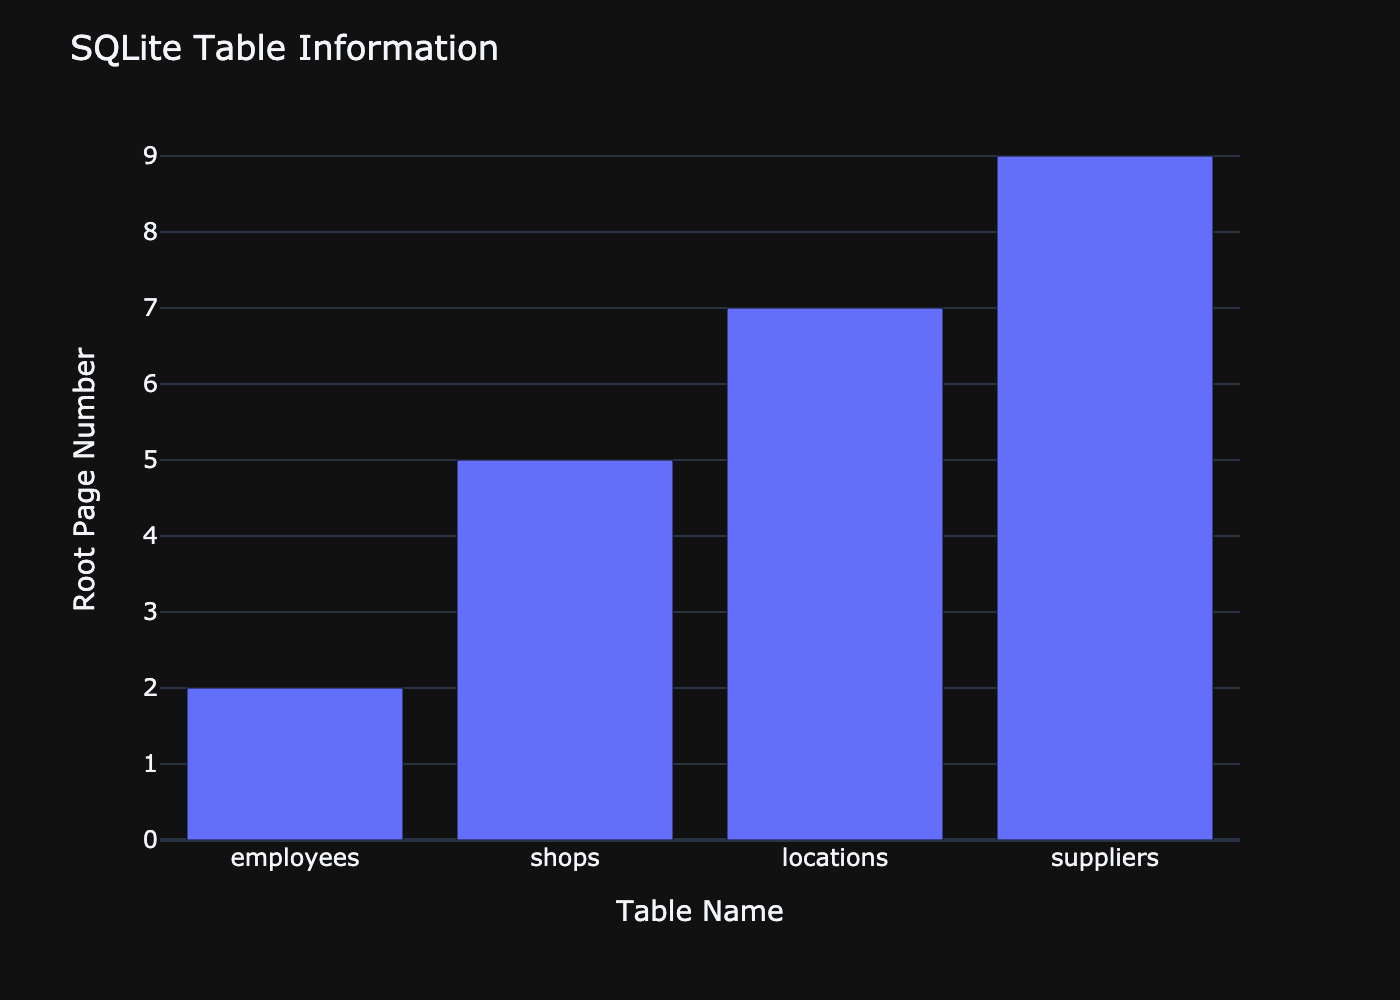

("SELECT * FROM sqlite_master WHERE type='table';",
     type       name   tbl_name  rootpage  \
 0  table  employees  employees         2   
 1  table      shops      shops         5   
 2  table  locations  locations         7   
 3  table  suppliers  suppliers         9   
 
                                                  sql  
 0  CREATE TABLE employees (\n        employee_id ...  
 1  CREATE TABLE shops (\n        coffeeshop_id IN...  
 2  CREATE TABLE locations (\n        city_id INT ...  
 3  CREATE TABLE suppliers (\n        coffeeshop_i...  ,
 None)

In [10]:
vn.ask(question='show all tables')

In [9]:
vn.ask(question='')

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2
Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4


[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE suppliers (\n        coffeeshop_id INT,\n        supplier_name VARCHAR(40),\n        coffee_type VARCHAR(20),\n        PRIMARY KEY (coffeeshop_id, supplier_name),\n        FOREIGN KEY (coffeeshop_id) REFERENCES shops (coffeeshop_id) ON DELETE CASCADE\n    )\n\nCREATE TABLE employees (\n        employee_id INT PRIMARY KEY,\n        first_name VARCHAR(50),\n        last_name VARCHAR(50),\n        email VARCHAR(50),\n        hire_date DATE,\n        gender VARCHAR(1), -- "M"/"F" (male/female)\n        salary INT,\n        coffeeshop_id INT,\n        FOREIGN KEY (coffeeshop_id) REFERENCES shops (coffe

Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4


[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE employees (\n        employee_id INT PRIMARY KEY,\n        first_name VARCHAR(50),\n        last_name VARCHAR(50),\n        email VARCHAR(50),\n        hire_date DATE,\n        gender VARCHAR(1), -- "M"/"F" (male/female)\n        salary INT,\n        coffeeshop_id INT,\n        FOREIGN KEY (coffeeshop_id) REFERENCES shops (coffeeshop_id) ON DELETE SET NULL\n    )\n\nCREATE TABLE shops (\n        coffeeshop_id INT PRIMARY KEY,\n        coffeeshop_name VARCHAR(50),\n        city_id INT,\n        FOREIGN KEY (city_id) REFERENCES locations (city_id) ON DELETE SET NULL\n    )\n\nCREATE TABLE locations 

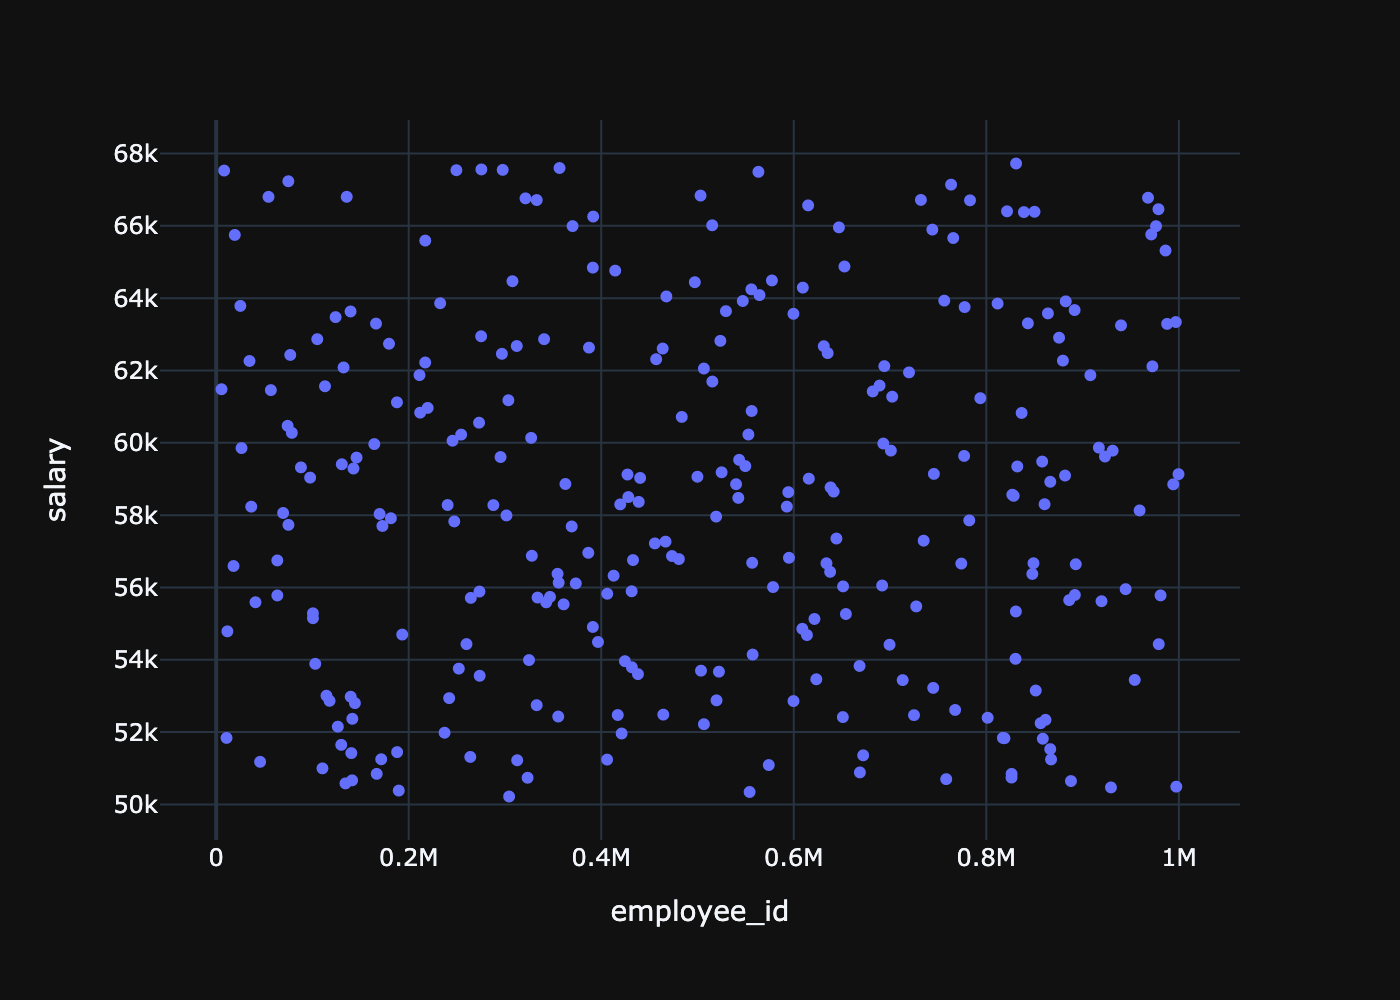

('SELECT *\nFROM employees\nWHERE salary > 50000;',
      employee_id  first_name    last_name                      email  \
 0         144108      Khalil         Corr           kcorr1@github.io   
 1         782284  Vilhelmina       Rayman         vrayman2@jigsy.com   
 2         614903       Hamel      Grocock         hgrocock4@nasa.gov   
 3          75097       Wally      Huebner         whuebnerc@dmoz.org   
 4         608868   Annabelle     Ottiwill   aottiwillj@wordpress.com   
 ..           ...         ...          ...                        ...   
 283       923221       Syman      Pellett       spellettr9@ameblo.jp   
 284       875576       Loren    Greeveson                       None   
 285       756330     Georgia  Scarisbrick  gscarisbrickrf@unesco.org   
 286       427264      Tillie       Button                       None   
 287       644289    Julianna        Sydry                       None   
 
       hire_date gender  salary  coffeeshop_id  
 0    2014/04/23     

In [11]:
vn.ask(question='Select only the employees who make more than 50k')

Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4


[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE employees (\n        employee_id INT PRIMARY KEY,\n        first_name VARCHAR(50),\n        last_name VARCHAR(50),\n        email VARCHAR(50),\n        hire_date DATE,\n        gender VARCHAR(1), -- "M"/"F" (male/female)\n        salary INT,\n        coffeeshop_id INT,\n        FOREIGN KEY (coffeeshop_id) REFERENCES shops (coffeeshop_id) ON DELETE SET NULL\n    )\n\nCREATE TABLE suppliers (\n        coffeeshop_id INT,\n        supplier_name VARCHAR(40),\n        coffee_type VARCHAR(20),\n        PRIMARY KEY (coffeeshop_id, supplier_name),\n        FOREIGN KEY (coffeeshop_id) REFERENCES shops (coff

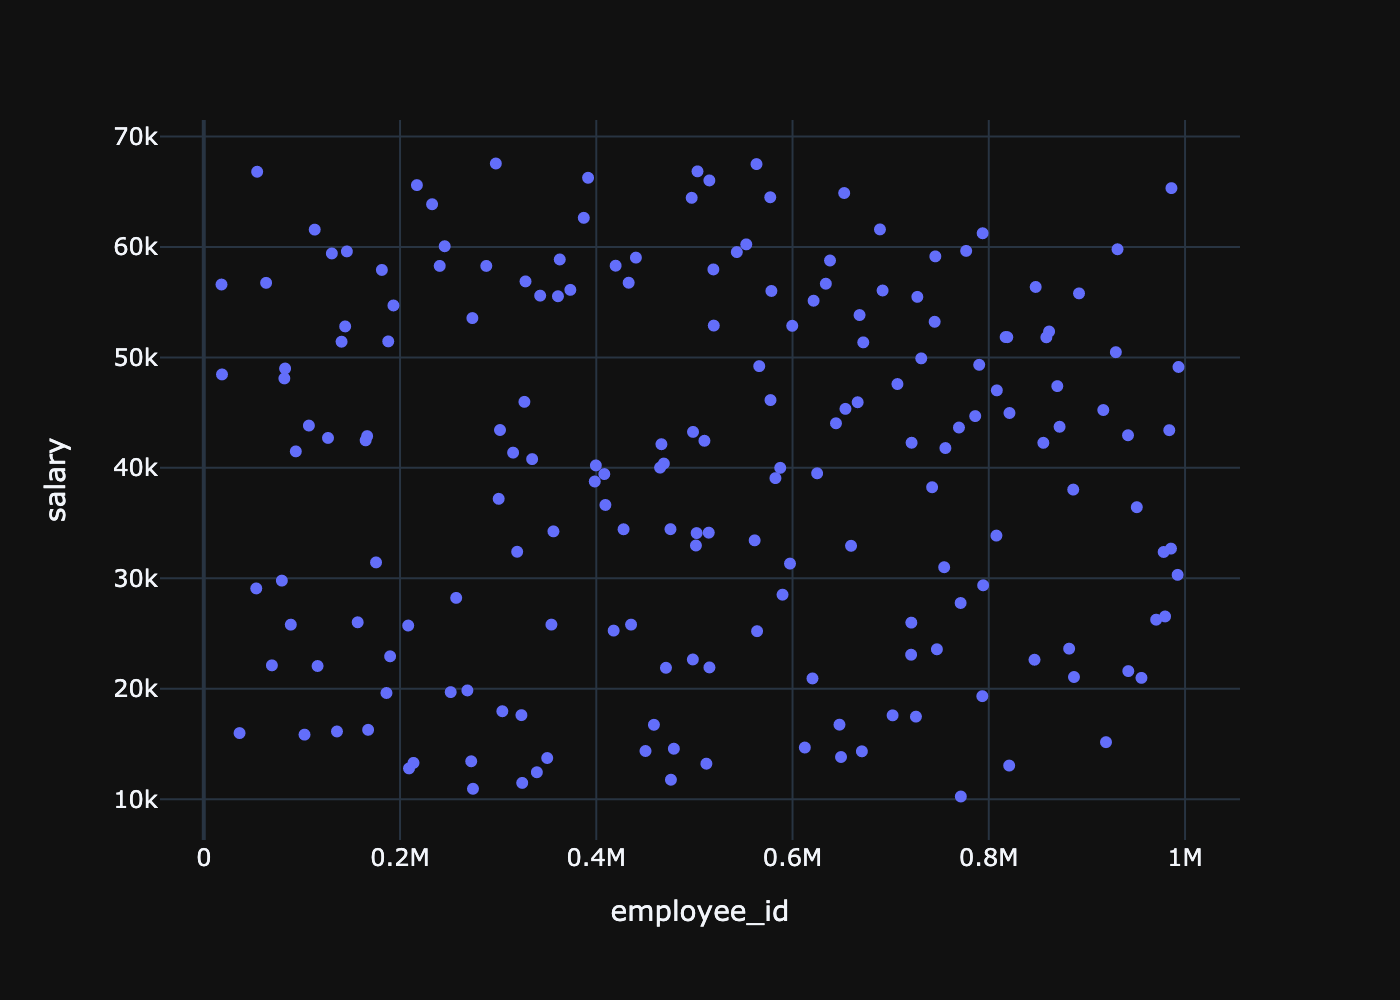

("SELECT * \nFROM employees \nWHERE coffeeshop_id IN (\n  SELECT coffeeshop_id \n  FROM shops \n  WHERE coffeeshop_name = 'Common Grounds'\n);",
      employee_id first_name   last_name                        email  \
 0         501559     Carson     Mosconi         cmosconi0@census.gov   
 1         144108     Khalil        Corr             kcorr1@github.io   
 2         659627     Austen  Waterhouse  awaterhoused@infoseek.co.jp   
 3         649417     Terese    Monshall   tmonshalll@miibeian.gov.cn   
 4         790257        Rab      Dafter      rdafterr@eventbrite.com   
 ..           ...        ...         ...                          ...   
 182       691775        Ami     Cappell          acappellr6@ehow.com   
 183       475619     Carole    Le Floch         cleflochr7@mysql.com   
 184       731179      Ilyse      Tapley       itapleyrh@edublogs.org   
 185       471002        Sly        Fern        sfernrm@google.com.hk   
 186       706898   Cathrine     Barkley      cbarkl

In [12]:
vn.ask(question='Select only the employees who work in Common Grounds coffeshop')

Number of requested results 10 is greater than number of elements in index 5, updating n_results = 5
Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4


[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE employees (\n        employee_id INT PRIMARY KEY,\n        first_name VARCHAR(50),\n        last_name VARCHAR(50),\n        email VARCHAR(50),\n        hire_date DATE,\n        gender VARCHAR(1), -- "M"/"F" (male/female)\n        salary INT,\n        coffeeshop_id INT,\n        FOREIGN KEY (coffeeshop_id) REFERENCES shops (coffeeshop_id) ON DELETE SET NULL\n    )\n\nCREATE TABLE shops (\n        coffeeshop_id INT PRIMARY KEY,\n        coffeeshop_name VARCHAR(50),\n        city_id INT,\n        FOREIGN KEY (city_id) REFERENCES locations (city_id) ON DELETE SET NULL\n    )\n\nCREATE TABLE suppliers 

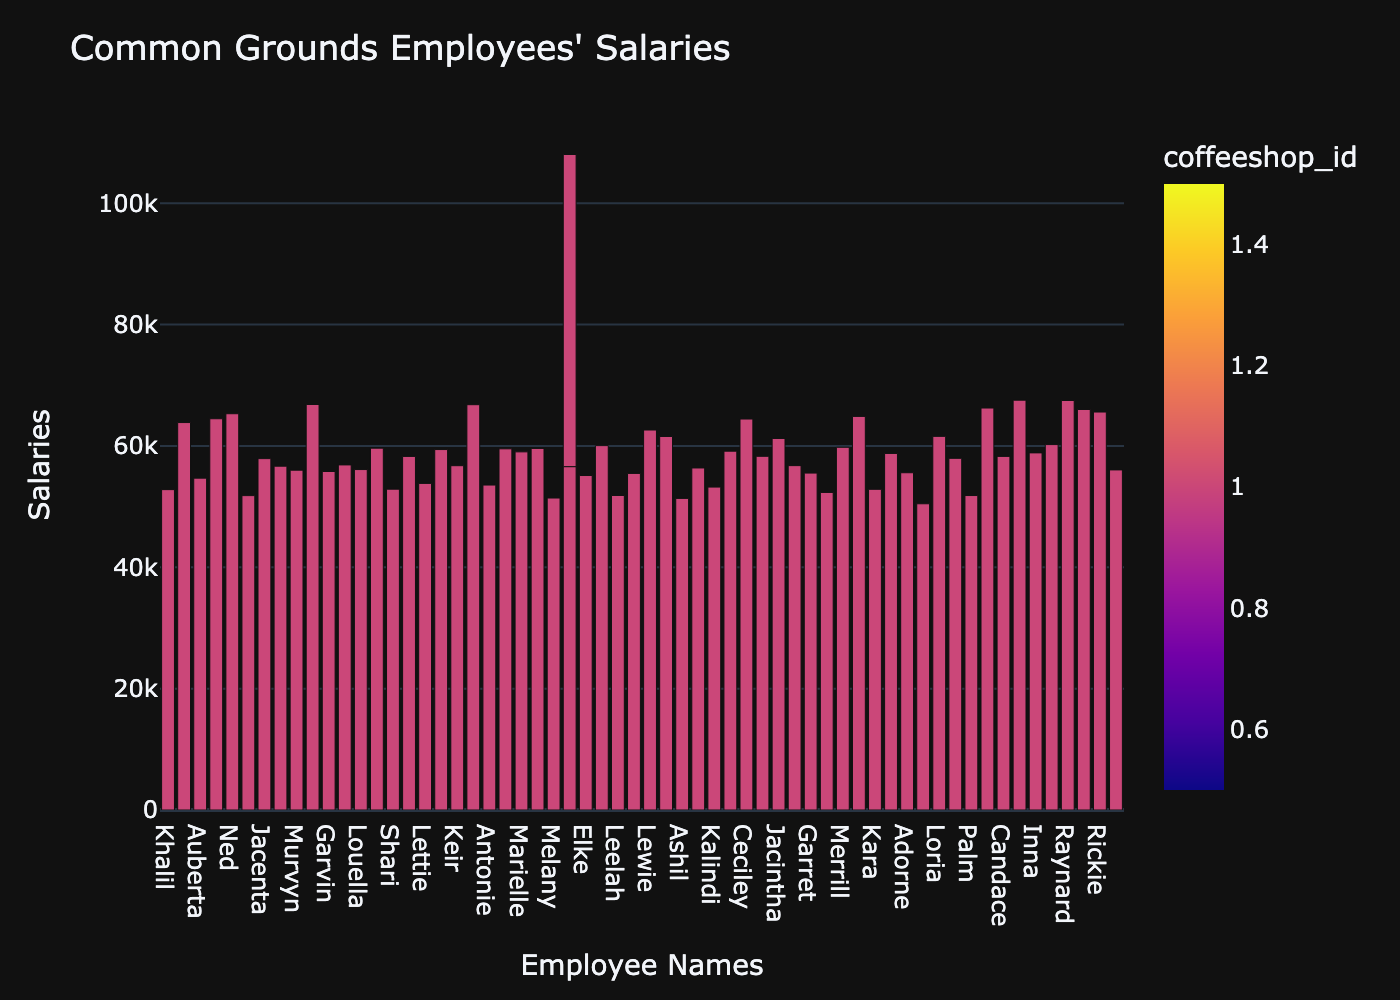

("SELECT *\nFROM employees\nWHERE coffeeshop_id IN (\n  SELECT coffeeshop_id \n  FROM shops \n  WHERE coffeeshop_name = 'Common Grounds'\n)\nAND salary > 50000;",
     employee_id first_name    last_name                              email  \
 0        144108     Khalil         Corr                   kcorr1@github.io   
 1        232690     Pincas     Mariotte            pmariotte1b@reuters.com   
 2        193281    Auberta       Greves           agreves1e@wikispaces.com   
 3        577294    Estevan       Wornum                               None   
 4        986129        Ned  Castellanos       ncastellanos1x@hostgator.com   
 ..          ...        ...          ...                                ...   
 56       552851    Vidovic       Elster                velsterqj@wikia.com   
 57       563265    Raynard  Westmorland           rwestmorlandql@adobe.com   
 58       515229      Darby      Clawley  dclawleyqo@nationalgeographic.com   
 59       217200     Rickie      Bisacre       

In [13]:
vn.ask(question='Select all the employees who work in Common Grounds and make more than 50k')

Number of requested results 10 is greater than number of elements in index 6, updating n_results = 6
Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4


[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE employees (\n        employee_id INT PRIMARY KEY,\n        first_name VARCHAR(50),\n        last_name VARCHAR(50),\n        email VARCHAR(50),\n        hire_date DATE,\n        gender VARCHAR(1), -- "M"/"F" (male/female)\n        salary INT,\n        coffeeshop_id INT,\n        FOREIGN KEY (coffeeshop_id) REFERENCES shops (coffeeshop_id) ON DELETE SET NULL\n    )\n\nCREATE TABLE shops (\n        coffeeshop_id INT PRIMARY KEY,\n        coffeeshop_name VARCHAR(50),\n        city_id INT,\n        FOREIGN KEY (city_id) REFERENCES locations (city_id) ON DELETE SET NULL\n    )\n\nCREATE TABLE suppliers 

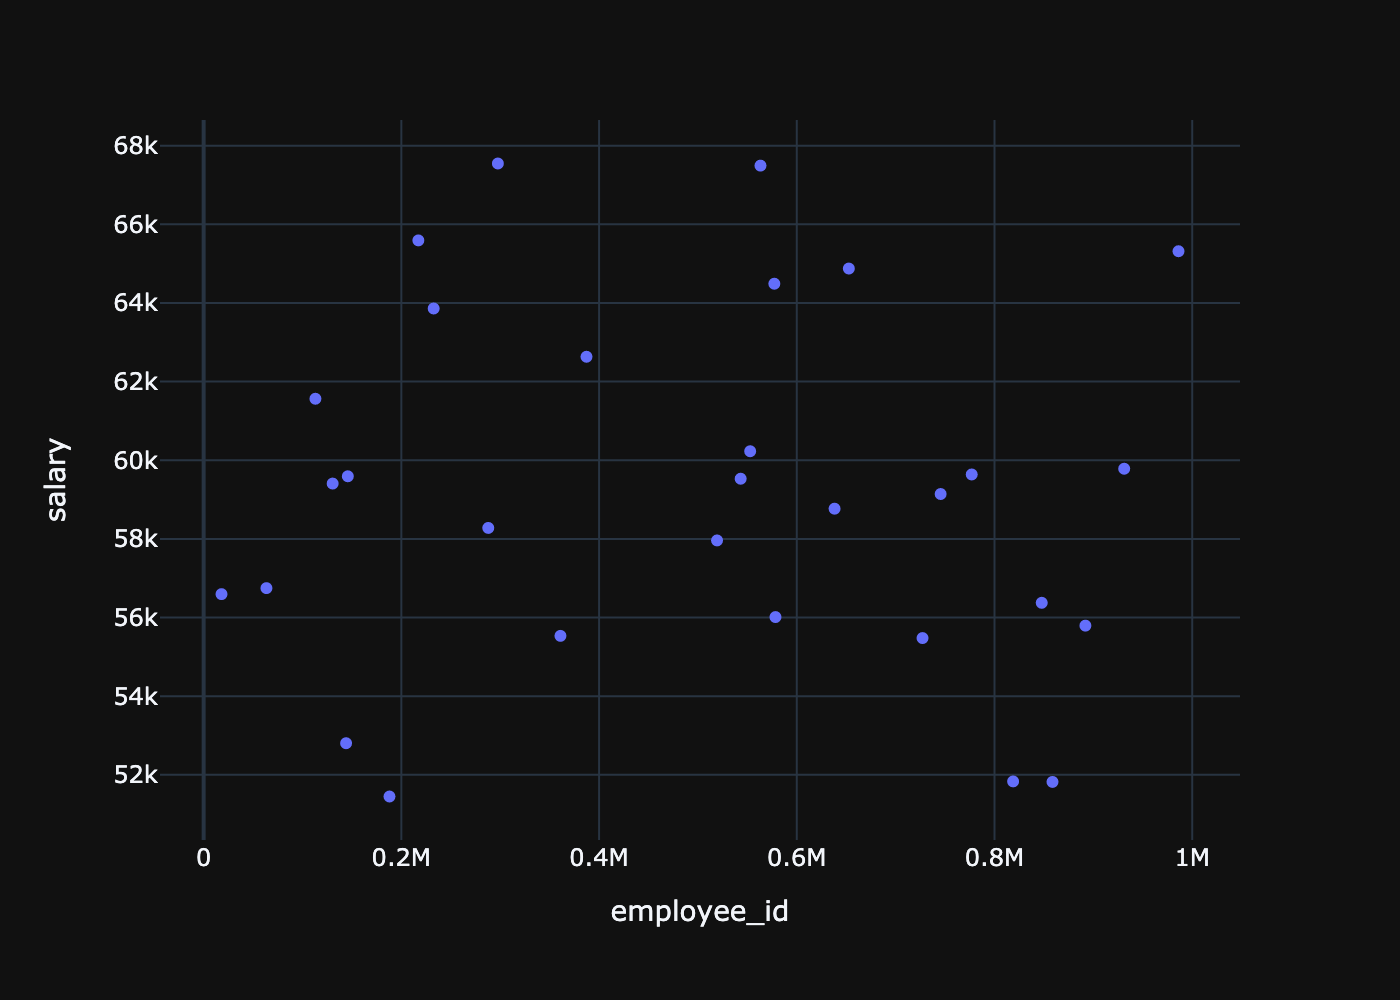

("SELECT *\nFROM employees\nWHERE coffeeshop_id IN (\n  SELECT coffeeshop_id \n  FROM shops \n  WHERE coffeeshop_name = 'Common Grounds'\n)\nAND salary > 50000\nAND gender = 'M';",
     employee_id   first_name    last_name                         email  \
 0        144108       Khalil         Corr              kcorr1@github.io   
 1        232690       Pincas     Mariotte       pmariotte1b@reuters.com   
 2        577294      Estevan       Wornum                          None   
 3        986129          Ned  Castellanos  ncastellanos1x@hostgator.com   
 4        858668       Wright        Jermy                          None   
 5        578451       Murvyn       Lanney     mlanney38@squarespace.com   
 6        891944       Garvin       Davidy           gdavidy3n@topsy.com   
 7        776952        Alick     Sambrook          asambrook4v@xrea.com   
 8        287914        Hamel      Vineall                          None   
 9        130514       Raddie     Lishmund           rlishm

In [14]:
vn.ask(question='Select all the employees who work in Common Grounds, make more than 50k and are male')

Number of requested results 10 is greater than number of elements in index 7, updating n_results = 7
Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4


[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE suppliers (\n        coffeeshop_id INT,\n        supplier_name VARCHAR(40),\n        coffee_type VARCHAR(20),\n        PRIMARY KEY (coffeeshop_id, supplier_name),\n        FOREIGN KEY (coffeeshop_id) REFERENCES shops (coffeeshop_id) ON DELETE CASCADE\n    )\n\nCREATE TABLE shops (\n        coffeeshop_id INT PRIMARY KEY,\n        coffeeshop_name VARCHAR(50),\n        city_id INT,\n        FOREIGN KEY (city_id) REFERENCES locations (city_id) ON DELETE SET NULL\n    )\n\nCREATE TABLE employees (\n        employee_id INT PRIMARY KEY,\n        first_name VARCHAR(50),\n        last_name VARCHAR(50),\n  

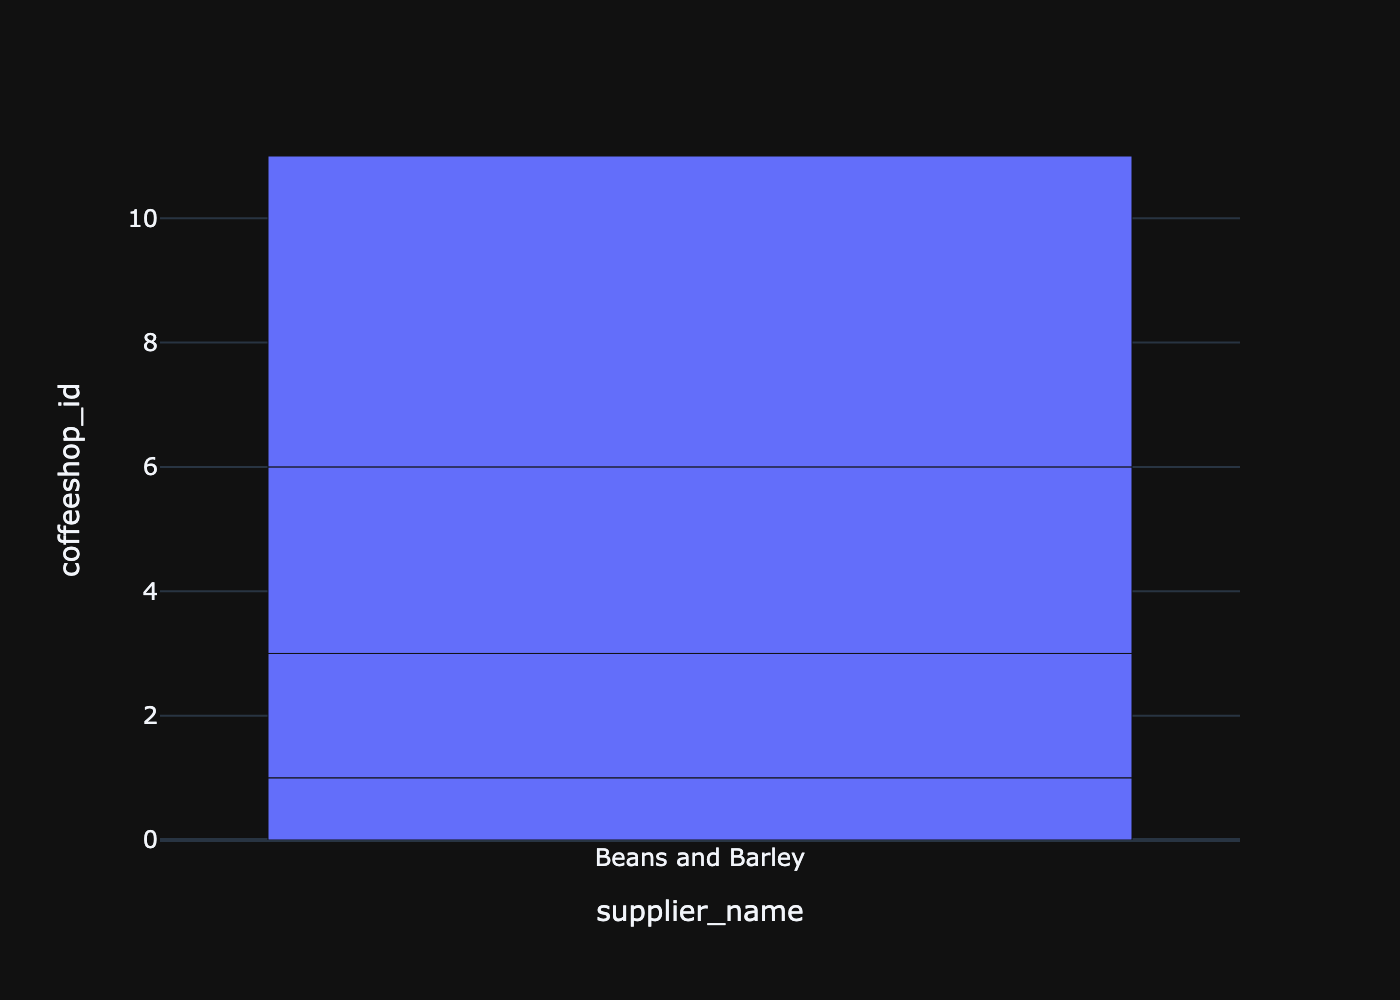

("SELECT * \nFROM suppliers \nWHERE supplier_name = 'Beans and Barley';",
    coffeeshop_id     supplier_name coffee_type
 0              1  Beans and Barley     Arabica
 1              2  Beans and Barley     Arabica
 2              3  Beans and Barley     Arabica
 3              5  Beans and Barley     Arabica,
 None)

In [15]:
vn.ask(question='Select all rows from the suppliers table where the supplier is Beans and Barley')

Number of requested results 10 is greater than number of elements in index 8, updating n_results = 8
Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4


[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE suppliers (\n        coffeeshop_id INT,\n        supplier_name VARCHAR(40),\n        coffee_type VARCHAR(20),\n        PRIMARY KEY (coffeeshop_id, supplier_name),\n        FOREIGN KEY (coffeeshop_id) REFERENCES shops (coffeeshop_id) ON DELETE CASCADE\n    )\n\nCREATE TABLE shops (\n        coffeeshop_id INT PRIMARY KEY,\n        coffeeshop_name VARCHAR(50),\n        city_id INT,\n        FOREIGN KEY (city_id) REFERENCES locations (city_id) ON DELETE SET NULL\n    )\n\nCREATE TABLE employees (\n        employee_id INT PRIMARY KEY,\n        first_name VARCHAR(50),\n        last_name VARCHAR(50),\n  

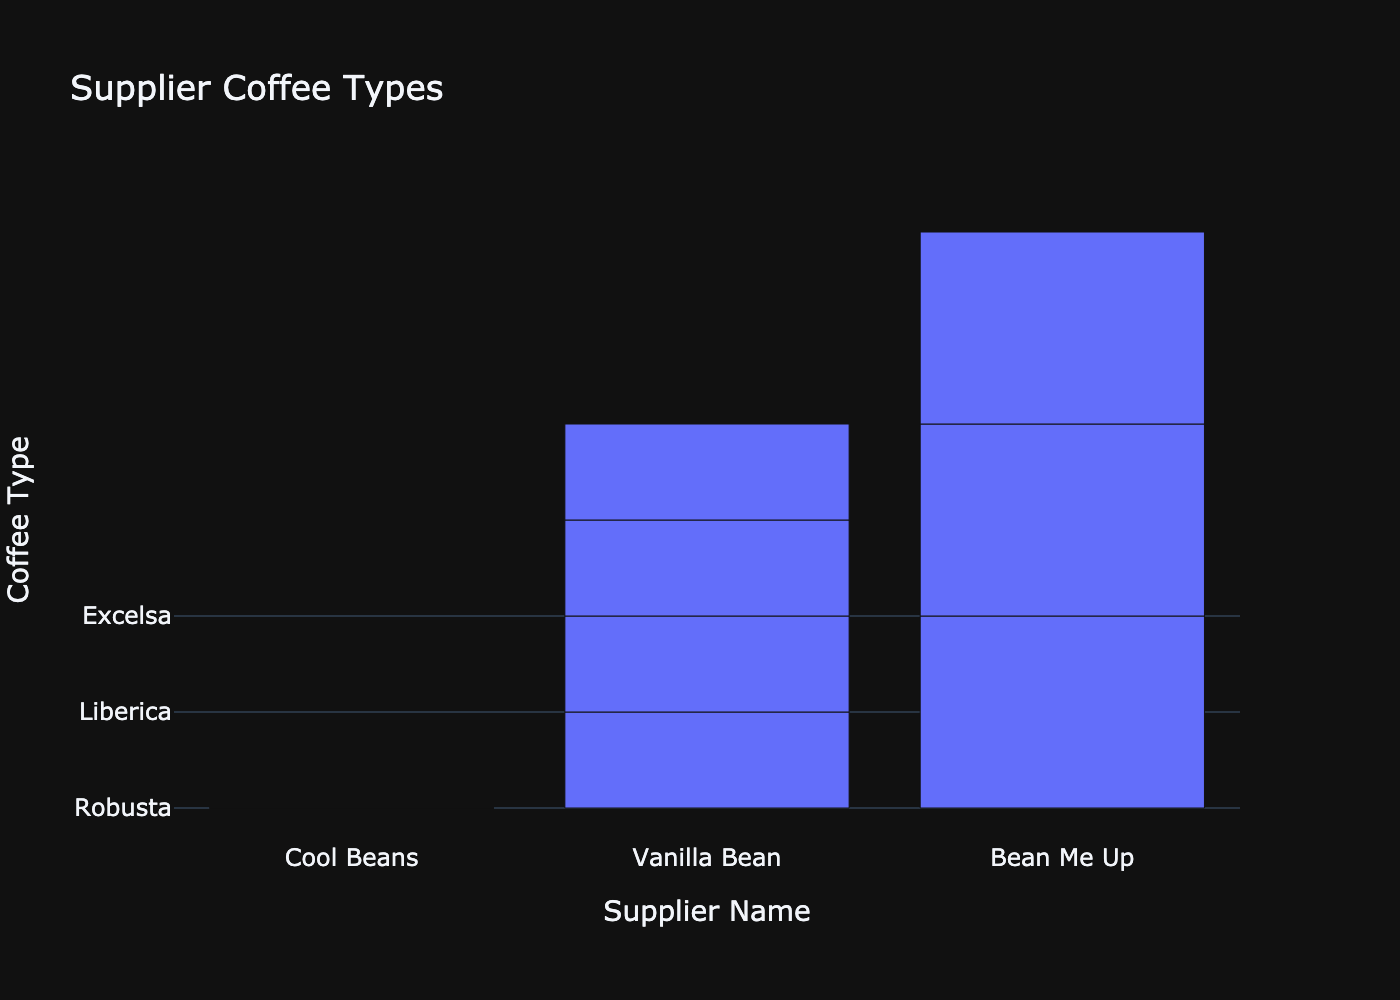

("SELECT *\nFROM suppliers\nWHERE supplier_name != 'Beans and Barley';",
    coffeeshop_id supplier_name coffee_type
 0              1    Cool Beans     Robusta
 1              2  Vanilla Bean    Liberica
 2              2    Cool Beans     Robusta
 3              3    Bean Me Up     Excelsa
 4              3  Vanilla Bean    Liberica
 5              3    Cool Beans     Robusta
 6              4  Vanilla Bean    Liberica
 7              4    Bean Me Up     Excelsa
 8              5  Vanilla Bean    Liberica
 9              5    Bean Me Up     Excelsa,
 None)

In [16]:
vn.ask(question='Select all rows from the suppliers table where the supplier is NOT Beans and Barley')

Number of requested results 10 is greater than number of elements in index 9, updating n_results = 9
Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4


[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE suppliers (\n        coffeeshop_id INT,\n        supplier_name VARCHAR(40),\n        coffee_type VARCHAR(20),\n        PRIMARY KEY (coffeeshop_id, supplier_name),\n        FOREIGN KEY (coffeeshop_id) REFERENCES shops (coffeeshop_id) ON DELETE CASCADE\n    )\n\nCREATE TABLE employees (\n        employee_id INT PRIMARY KEY,\n        first_name VARCHAR(50),\n        last_name VARCHAR(50),\n        email VARCHAR(50),\n        hire_date DATE,\n        gender VARCHAR(1), -- "M"/"F" (male/female)\n        salary INT,\n        coffeeshop_id INT,\n        FOREIGN KEY (coffeeshop_id) REFERENCES shops (coffe

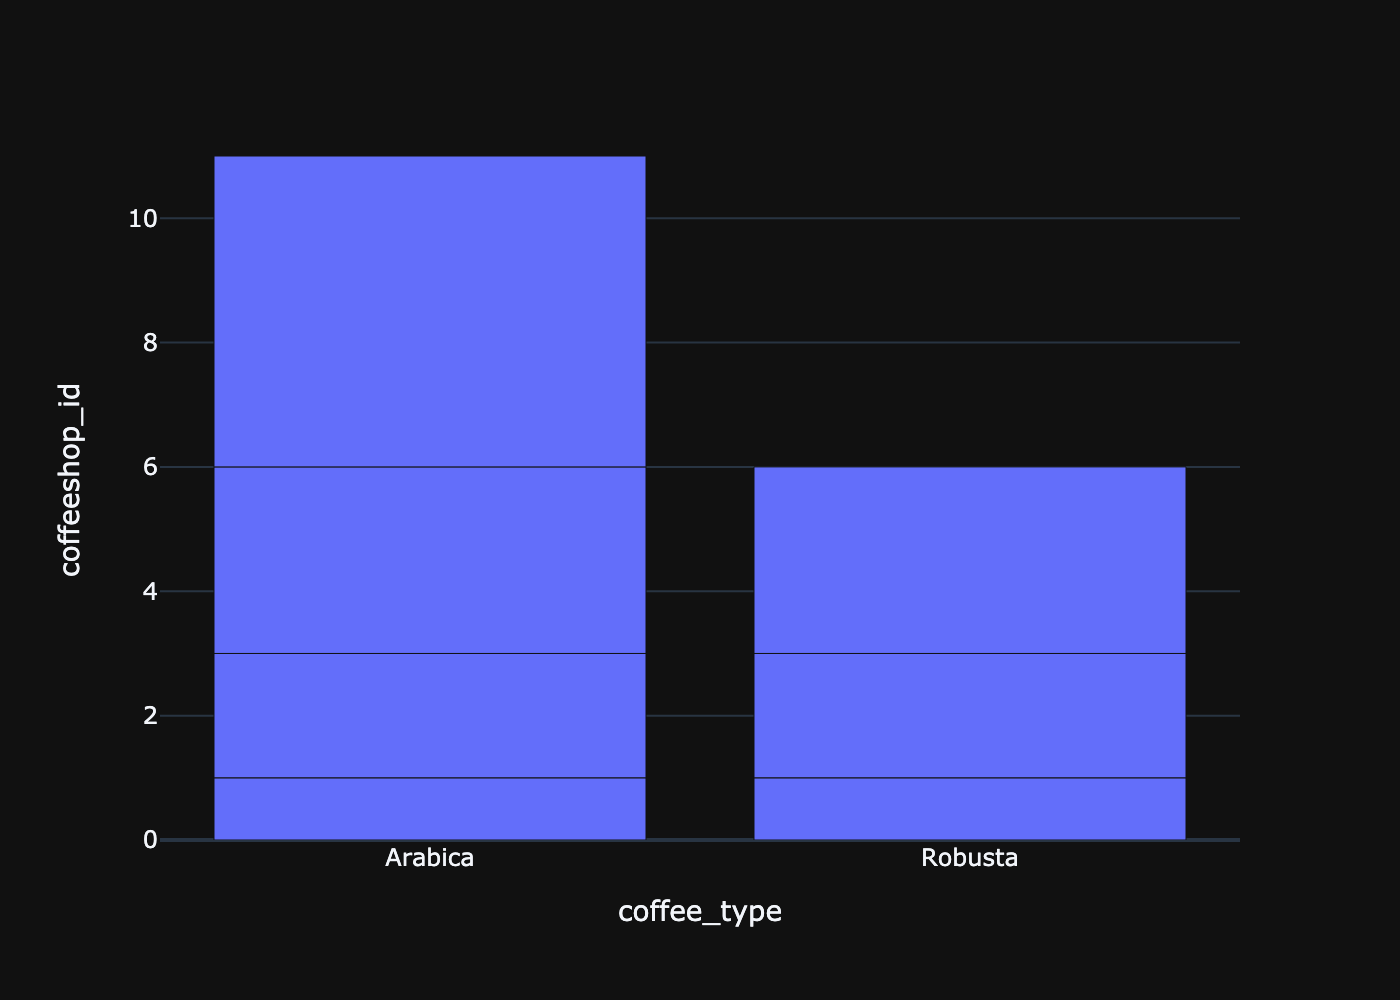

("SELECT *\nFROM suppliers\nWHERE coffee_type IN ('Robusta', 'Arabica');",
    coffeeshop_id     supplier_name coffee_type
 0              1  Beans and Barley     Arabica
 1              1        Cool Beans     Robusta
 2              2  Beans and Barley     Arabica
 3              2        Cool Beans     Robusta
 4              3        Cool Beans     Robusta
 5              3  Beans and Barley     Arabica
 6              5  Beans and Barley     Arabica,
 None)

In [17]:
vn.ask(question='Select all Robusta and Arabica coffee types')

Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4


[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE suppliers (\n        coffeeshop_id INT,\n        supplier_name VARCHAR(40),\n        coffee_type VARCHAR(20),\n        PRIMARY KEY (coffeeshop_id, supplier_name),\n        FOREIGN KEY (coffeeshop_id) REFERENCES shops (coffeeshop_id) ON DELETE CASCADE\n    )\n\nCREATE TABLE employees (\n        employee_id INT PRIMARY KEY,\n        first_name VARCHAR(50),\n        last_name VARCHAR(50),\n        email VARCHAR(50),\n        hire_date DATE,\n        gender VARCHAR(1), -- "M"/"F" (male/female)\n        salary INT,\n        coffeeshop_id INT,\n        FOREIGN KEY (coffeeshop_id) REFERENCES shops (coffe

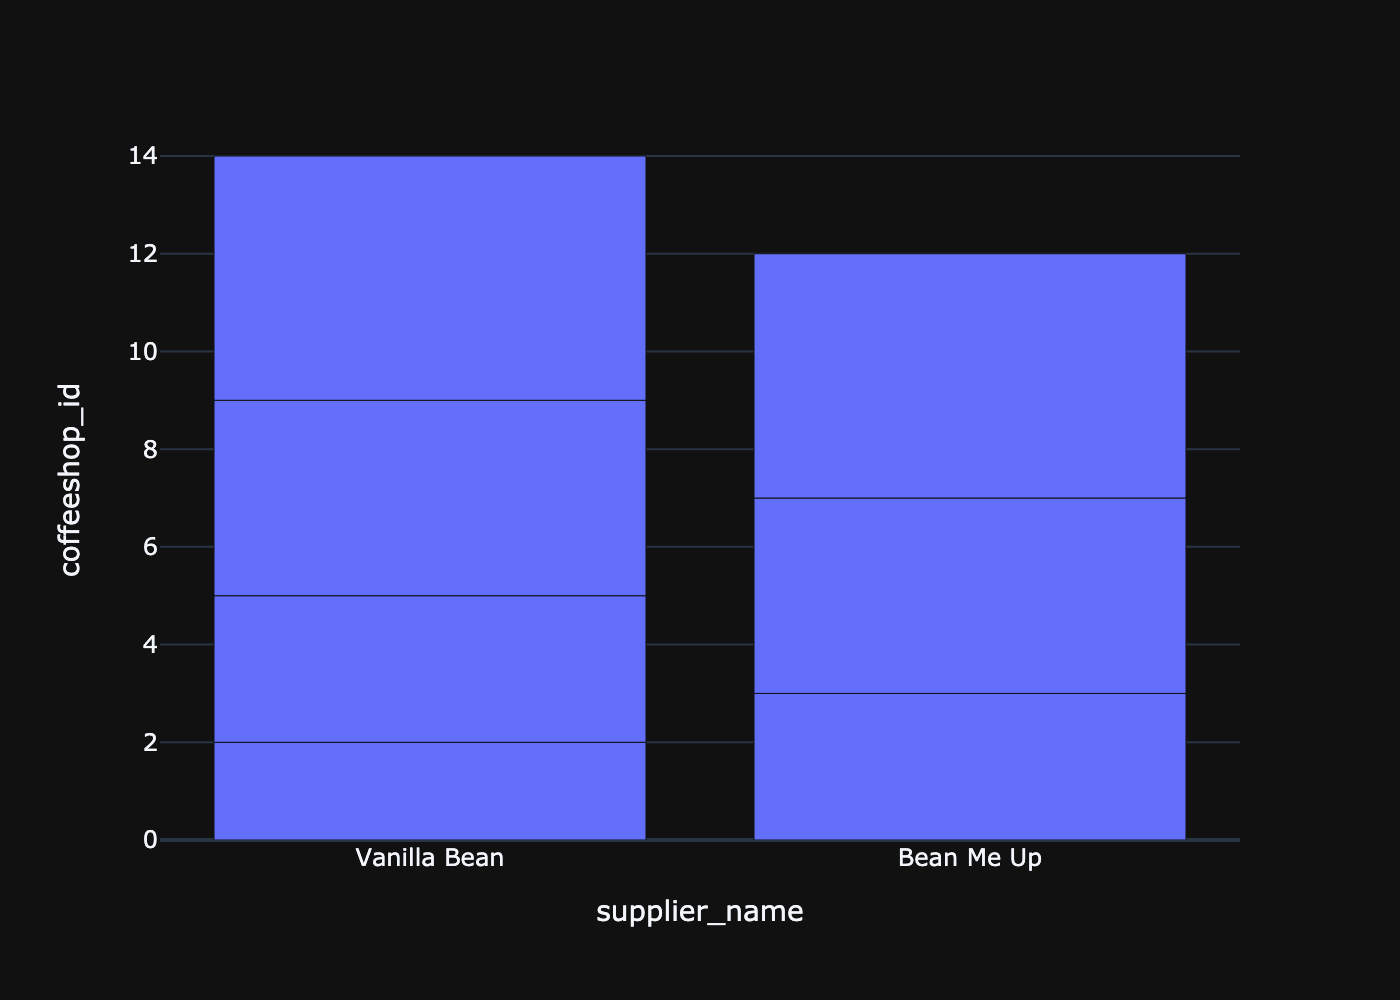

("SELECT *\nFROM suppliers\nWHERE coffee_type NOT IN ('Robusta', 'Arabica');",
    coffeeshop_id supplier_name coffee_type
 0              2  Vanilla Bean    Liberica
 1              3    Bean Me Up     Excelsa
 2              3  Vanilla Bean    Liberica
 3              4  Vanilla Bean    Liberica
 4              4    Bean Me Up     Excelsa
 5              5  Vanilla Bean    Liberica
 6              5    Bean Me Up     Excelsa,
 None)

In [18]:
vn.ask(question='Select all coffee types that are not Robusta or Arabica')

Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4


[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE employees (\n        employee_id INT PRIMARY KEY,\n        first_name VARCHAR(50),\n        last_name VARCHAR(50),\n        email VARCHAR(50),\n        hire_date DATE,\n        gender VARCHAR(1), -- "M"/"F" (male/female)\n        salary INT,\n        coffeeshop_id INT,\n        FOREIGN KEY (coffeeshop_id) REFERENCES shops (coffeeshop_id) ON DELETE SET NULL\n    )\n\nCREATE TABLE shops (\n        coffeeshop_id INT PRIMARY KEY,\n        coffeeshop_name VARCHAR(50),\n        city_id INT,\n        FOREIGN KEY (city_id) REFERENCES locations (city_id) ON DELETE SET NULL\n    )\n\nCREATE TABLE suppliers 

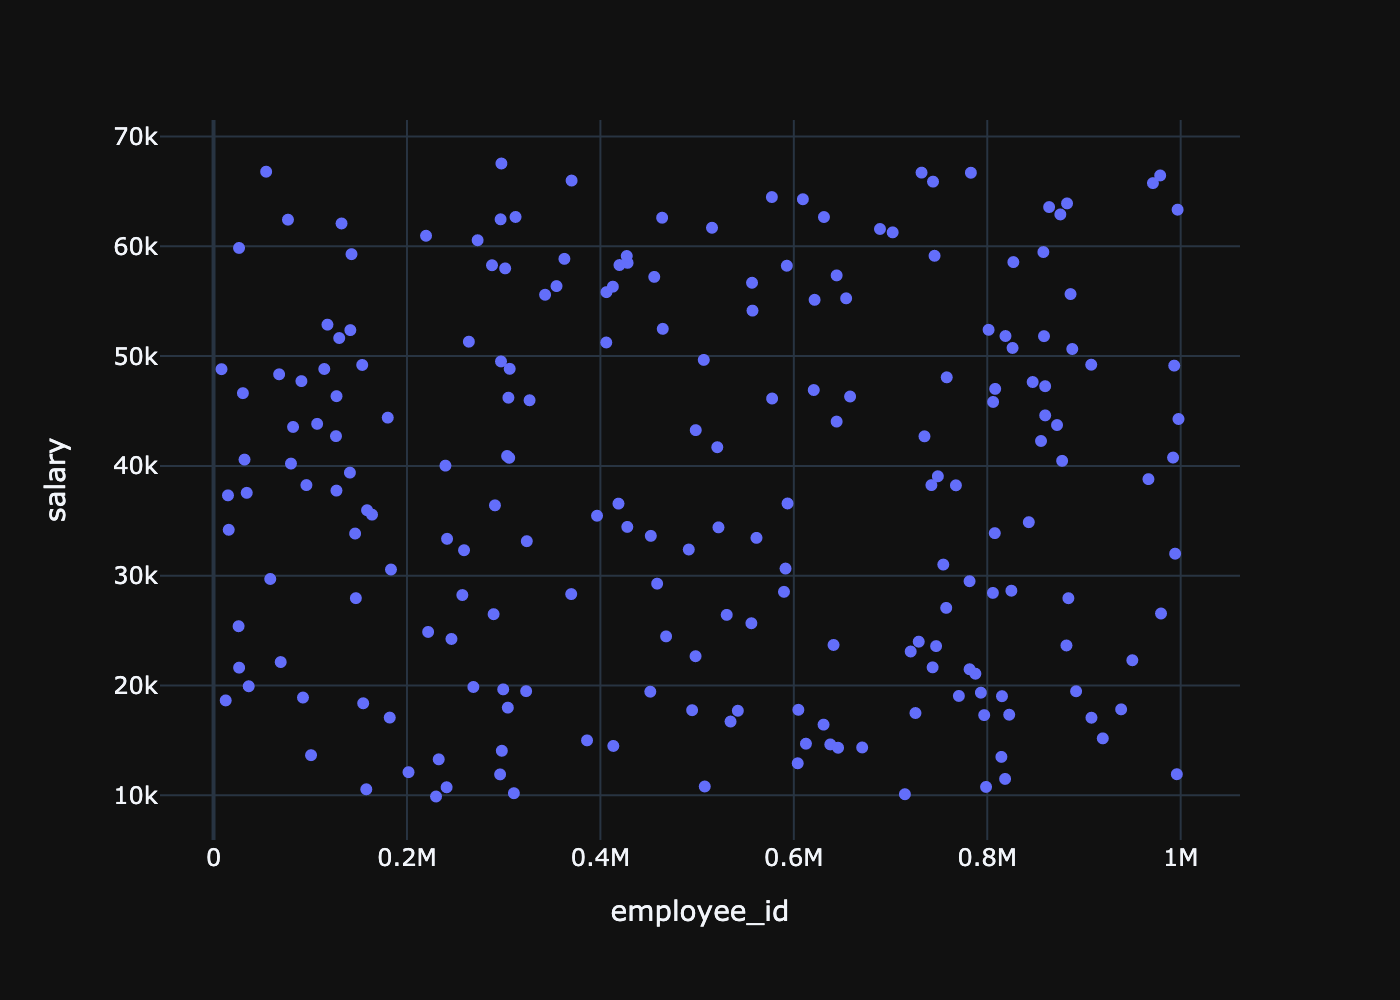

('SELECT * \nFROM employees \nWHERE email IS NULL;',
      employee_id first_name      last_name email   hire_date gender  salary  \
 0         877425     Horten           Byre  None  2022/05/21      M   40458   
 1         826977      Lucas         Cuphus  None  2021/12/21      M   58566   
 2         824952      Marja          Lacey  None  2010/02/28      F   28628   
 3         793404       Aili          Stowe  None  2014/08/09      F   19337   
 4         702218      Eliza        Gonzalo  None  2022/12/11      F   61276   
 ..           ...        ...            ...   ...         ...    ...     ...   
 204       992121     Corbin  Van der Kruys  None  2015/12/01      M   40758   
 205       875576      Loren      Greeveson  None  2016/08/07      F   62907   
 206       427264     Tillie         Button  None  2020/11/10      F   59123   
 207       644289   Julianna          Sydry  None  2021/12/08      F   57353   
 208       767607       Burt           Doll  None  2023/01/15      

In [19]:
vn.ask(question='Select all employees with missing email addresses')

In [ ]:
vn.ask(question='')

In [ ]:
vn.ask(question='')

In [ ]:
vn.ask(question='')